<a href="https://colab.research.google.com/github/Nhatkhang/Machine_learning_CBD/blob/Project_assignments/Author_classification_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using NLP and techniques of supervised learning (including Deep
Learning) and unsupervised learning (emphasizing on unsupervised
for this project), and collect thousand texts from Gutenberg project
(and 7 novels) for at least 10 authors, build a project to classify
text-author. The project should follow the guideline as:

1. Pre-process data using Spacy and other methods.
2. Perform data exploration
3. Using Bag of Word, apply supervised models such as Naive
Bayes, Logistic Regression, Decision Tree, Random Forest,
KNN, SVM and Gradient Boosting, including GridSearchCV.
4. Similar to 3., but using TF-IDF.
5. Similar to 3., but using word2vec.
6. Appy RNN to do classification.
7. Using unsupervised technique, visualize bar graphs for clusters
containing 10 author documents. Adjust by silhouette scores.
8. Using LSA, LDA and NNMF, print out top ten words (with their
highest loading) for each topic modeling. Analyze and compare
among three methods.
9. Write up analysis and conclusions.

# Introduction
The main goal of this report is to research and present the NLP techniques including supervised and unsupervised learning to build a authorship classifier. The text processing tools in this report are Bag of word, TF-IDF and word2vec applied to the Gutenberg data set. This report is structured as followed:
1. Load and process data
2. Data Exploration
3. Supervised learning used Bag of Word, TF-IDF, Word2vec
4. Recurrent neural network (RNN)
5. Unsupervised learning
6. Application of LSA
7. Conclusion






## 1. Load and process data

In [0]:
### importing libraries
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
%matplotlib inline
import nltk
import random
import time
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords # Import the stop word list
from random import randint 
from nltk.tokenize import RegexpTokenizer
from sklearn import tree
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier 
import warnings
warnings.filterwarnings("ignore")

In [2]:
nltk.download('gutenberg')
nltk.download('stopwords')

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [0]:
file_ID=nltk.corpus.gutenberg.fileids()
author_list=[]
data_set=[]
for f in file_ID: 
  tmp=(nltk.corpus.gutenberg.words(f))
  for i in range(len(tmp)):
    if tmp[i]==']':
      author_list.append(tmp[1:i])
      data_set.append(tmp[i+1:len(tmp)])
      break
    

In [0]:
## remove stopwords
for i in range (len(file_ID)):
  #data_set[i]=[ w.lower() for w in data_set[i]] ## convert to lower case first
  data_set[i]=[w for w in data_set[i] if not w.lower() in stopwords.words("english")]

In [0]:
author=[]
name=[]
author_list[3]=['The', 'King', 'by','James', 'Bible'] ## adding by for easy
for i in range(len (file_ID)):
  #print(i,author_list[i])
  for k in range(len (author_list[i])):
    if author_list[i][k]=='by':
      author.append((author_list[i][k+1:len(author_list[i])]))
      name.append((author_list[i][0:k]))
authors=[]
for i in range(len(file_ID)):
  if author[i][-1].isnumeric() == True:
    authors.append(author[i][0:-1])
  else:
    authors.append(author[i])

authors=[" ".join(authors[i]) for i in range(len(authors))]
name=[" ".join(name[i]) for i in range(len(name))]

In [6]:
for i,k in zip(authors, name):
  print(i,k)

Jane Austen Emma
Jane Austen Persuasion
Jane Austen Sense and Sensibility
James Bible The King
William Blake Poems
Sara Cone Bryant Stories to Tell to Children
Thornton W . Burgess The Adventures of Buster Bear
Lewis Carroll Alice ' s Adventures in Wonderland
G . K . Chesterton The Ball and The Cross
G . K . Chesterton The Wisdom of Father Brown
G . K . Chesterton The Man Who Was Thursday
Maria Edgeworth The Parent ' s Assistant ,
Herman Melville Moby Dick
John Milton Paradise Lost
William Shakespeare The Tragedie of Julius Caesar
William Shakespeare The Tragedie of Hamlet
William Shakespeare The Tragedie of Macbeth
Walt Whitman Leaves of Grass


We have 18 texts with 12 unique authors. This quantity is too small to build a proper machine learning model, thus, additional stratergy is applied, i.e. each text will be devided into 1000 sub texts, then the total number of sample is increased while the labels (authorship) will remain the same. 

In [0]:
def randomList(m, n):   # function to create a list with length M and sum of them is N
    # Create an array of size m where  
    # every element is initialized to 0  
    arr = [0] * m;  
    # To make the sum of the final list as n  
    for i in range(n) : 
        # Increment any random element  
        arr[randint(0, n) % m] += 1;  
    return arr

In [8]:
update_data_set=[]
update_name=[]
update_author=[]
for i in range (len(file_ID)):
  arr=randomList(200, len(data_set[i]))
  st=0
  for ii in arr:
    fs=st+ii
    update_data_set.append(" ".join(data_set[i][st:fs]))
    update_name.append(name[i])
    update_author.append(authors[i])
    st=fs
  print(fs,len(data_set[i]))

103970 103970
52381 52381
74822 74822
593752 593752
5219 5219
30661 30661
10208 10208
19008 19008
54019 54019
48114 48114
38807 38807
118066 118066
152910 152910
61893 61893
16079 16079
22985 22985
14939 14939
93680 93680


In [0]:
tokenizer = RegexpTokenizer(r'\w+')
for i in range (len(update_data_set)):
    update_data_set[i] = tokenizer.tokenize(update_data_set[i])
    update_data_set[i] = " ".join(update_data_set[i]) ## rejoin


We have fisnihed the data preparation, we have a data set consists of 18000 samples categorized into 12 authors.

##2. Data Exploration

In [0]:
## convert to data frame
data=np.array([update_author, update_name,update_data_set])
data=np.transpose(data)
df = pd.DataFrame(data, columns=['Author', 'Book_name', 'Text'])

In [11]:
print(update_data_set[1])

Hartfield spite separate lawn shrubberies name really belong afforded equals Woodhouses first consequence looked many acquaintance place father universally civil one among could accepted lieu Miss Taylor even half day melancholy change Emma could sigh wish impossible things till father awoke made necessary cheerful spirits required support nervous man easily depressed fond every body used hating part hating change every kind Matrimony origin change always disagreeable means yet reconciled daughter marrying could ever speak compassion though entirely match affection obliged part Miss Taylor habits gentle selfishness never able suppose people could feel differently much disposed think Miss Taylor done sad thing would great deal happier spent rest life Hartfield Emma smiled chatted cheerfully could keep thoughts tea came impossible say exactly said dinner Poor Miss Taylor wish pity Mr Weston ever thought cannot agree papa know cannot Mr Weston good humoured pleasant excellent man thorough

In [12]:
print('Dataframe dimensions:', data.shape) ## print shape
pd.set_option('display.max_columns', None)
df.head(10)

Dataframe dimensions: (3600, 3)


,Author,Book_name,Text
0,Jane Austen,Emma,VOLUME CHAPTER Emma Woodhouse handsome clever ...
1,Jane Austen,Emma,Hartfield spite separate lawn shrubberies name...
2,Jane Austen,Emma,always welcome time welcome usual coming direc...
3,Jane Austen,Emma,time life settled home important secure comfor...
4,Jane Austen,Emma,kind office done think well Mr Elton way servi...
5,Jane Austen,Emma,made fortune bought house obtained wife beginn...
6,Jane Austen,Emma,brought alleviation Mr Woodhouse compliments n...
7,Jane Austen,Emma,body happiness quicksighted every body merits ...
8,Jane Austen,Emma,given soft blue eyes natural graces wasted inf...
9,Jane Austen,Emma,Harriet Smith therefore one could summon time ...


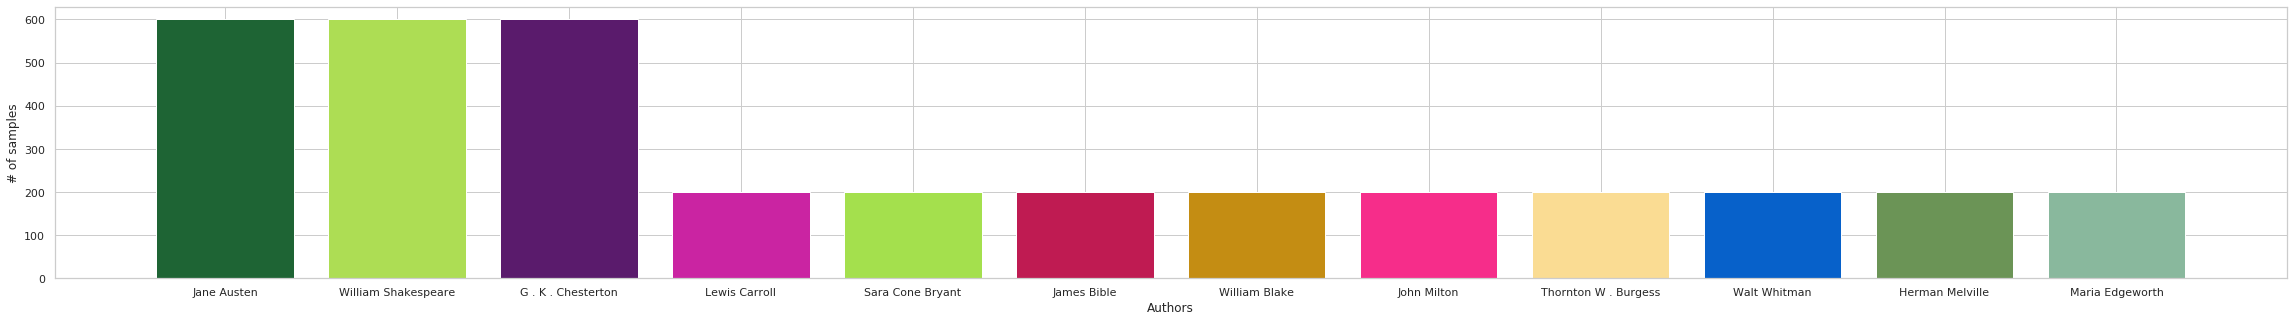

In [13]:
fig = plt.figure(1, figsize=(40,5))
y = df.Author.value_counts()
plt.bar(range(len(y)), y,tick_label=y.index,color=np.random.rand(18,3))
plt.xlabel("Authors")
plt.ylabel("# of samples")
COLOR = 'White'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR

In [0]:
all_words = df['Text'].str.split(expand=True).unstack().value_counts()

Text(0.5, 1.0, 'Top 25 words appears most in the data')

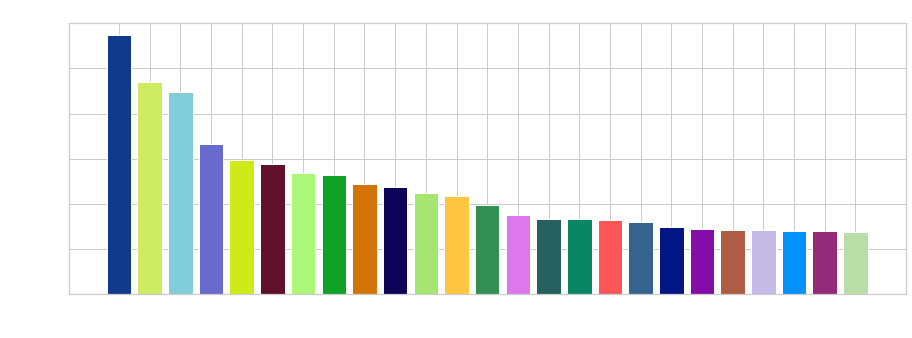

In [15]:
indx=all_words.index
fig = plt.figure(1, figsize=(15,5))
y = all_words[0:25]
plt.bar(range(len(y)), y,tick_label=indx[0:25],color=np.random.rand(25,3))
plt.xlabel("Words")
plt.ylabel("# of appear in text")
plt.title('Top 25 words appears most in the data')

Let's examine word count/length statistics:

In [16]:
document_lengths = np.array(list(map(len, df.Text.str.split(' '))))

print("The average number of words in a document is: {}.".format(np.mean(document_lengths)))
print("The minimum number of words in a document is: {}.".format(min(document_lengths)))
print("The maximum number of words in a document is: {}.".format(max(document_lengths)))

The average number of words in a document is: 302.54583333333335.
The minimum number of words in a document is: 8.
The maximum number of words in a document is: 2359.


Text(0, 0.5, 'Count')

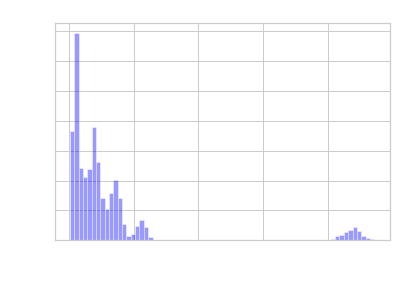

In [17]:
# Plot word count distribution
sns.distplot(document_lengths, kde = False, bins = 70, color = 'blue').set_title("Word Count Distribution")
plt.xlabel('Text Length (Words)')
plt.ylabel('Count')
#plt.xlim(0, 100)

Most of the text has the number of words less than 200.

In [18]:
print("There are {} samples with over 150 words.".format(sum(document_lengths > 150)))


There are 2042 samples with over 150 words.


In [19]:
df.Text[document_lengths == 10]

Series([], Name: Text, dtype: object)

In [0]:
df['document_lengths']=document_lengths

In [21]:
df[df.document_lengths>20]
df.head()

,Author,Book_name,Text,document_lengths
0,Jane Austen,Emma,VOLUME CHAPTER Emma Woodhouse handsome clever ...,400
1,Jane Austen,Emma,Hartfield spite separate lawn shrubberies name...,362
2,Jane Austen,Emma,always welcome time welcome usual coming direc...,335
3,Jane Austen,Emma,time life settled home important secure comfor...,383
4,Jane Austen,Emma,kind office done think well Mr Elton way servi...,398


We have finished the exploration of the data, thus we will move to next section.

In [0]:
## all word is dictionary


##3. Supervised learning used Bag of Word, TF-IDF, Word2vec

### 3.1 Bag of words

Create the training and test data

In [0]:
text_train, text_test, author_train, author_test = train_test_split(df.Text, df.Author, test_size = 0.2, random_state = 5)

In [0]:
# Check shapes of created datasets
print(np.shape(text_train))
print(np.shape(text_test))
print(np.shape(author_train))
print(np.shape(author_test))

(2880,)
(720,)
(2880,)
(720,)


Creating Features from a Bag of Words

In [0]:
print ("Creating the bag of words...\n")
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=5000).fit(text_train) 
train_X = vectorizer.transform(text_train)
train_X = train_X.toarray()
test_X = vectorizer.transform(text_test)
test_X = test_X.toarray()

Creating the bag of words...



In [0]:
print (train_X.shape)
print (test_X.shape)

(2880, 5000)
(720, 5000)


In [0]:
author_lb = LabelEncoder()
Y_train = author_lb.fit_transform(author_train)
Y_test = author_lb.transform(author_test)

In [0]:
## check the grid CV serach to have best parameter on 10 % data set
from sklearn.model_selection import GridSearchCV
DTC = tree.DecisionTreeClassifier()
RF = RandomForestClassifier()
GBC = GradientBoostingClassifier()
SVM = SVC()
LogR = LogisticRegression()
NVG = GaussianNB()
KNN = KNeighborsClassifier()
## 10% of data set
X_train_10=train_X[0:1440]
Y_train_10=Y_train[0:1440]
X_test_10 =test_X[0:360]
Y_test_10 =Y_test[0:360]
### parameter change
parameters_logr = [{'C': [1, 10,100]}]
parameters_dtc = [{'max_depth': [10,20,30] }]
parameters_RF = [{'n_estimators': [10,20,30]}]
parameters_GBC = [{'n_estimators': [10,20,30]}]
parameters_svm = [{'C': [1, 10,100]}]
parameters_knn = [{'n_neighbors': [10, 20,30]}]
model_parameters=[parameters_RF,parameters_logr,parameters_dtc,parameters_GBC,parameters_svm,parameters_knn]
## no change param for Naive Bayes

model_predict=[RF,LogR,DTC,GBC,SVM,KNN]
## SVM will be updated later
model_name=['Random Forest Classifier'
            ,'Logistic Regression'
            , 'Decision Tree Classifer'
            ,'Gradient Boosting Classifier'
            ,'SVM Classifier'
            ,'K-nearest neighbour']
for model, name, para in zip (model_predict,model_name,model_parameters):
    time_start = time.clock()
    grid_search = GridSearchCV(estimator = model,
                           param_grid = para,
                           scoring = 'accuracy',
                           cv = 5)
    grid_search = grid_search.fit(X_train_10, Y_train_10)
    accuracy = grid_search.best_score_
    param_best=grid_search.best_params_
    print(name)
    #para_out.append(param_best)
    print('Best parameter:     ', param_best)
    print('Best Accuracy: %12.3f'%accuracy)
print('======================End of gettting best parameter======================')
## 

Random Forest Classifier
Best parameter:      {'n_estimators': 30}
Best Accuracy:        0.878
Logistic Regression
Best parameter:      {'C': 1}
Best Accuracy:        0.974
Decision Tree Classifer
Best parameter:      {'max_depth': 20}
Best Accuracy:        0.779
Gradient Boosting Classifier
Best parameter:      {'n_estimators': 30}
Best Accuracy:        0.909
SVM Classifier
Best parameter:      {'C': 100}
Best Accuracy:        0.982
K-nearest neighbour
Best parameter:      {'n_neighbors': 10}
Best Accuracy:        0.156
======================End of gettting best parameter======================


In [0]:
DTC = tree.DecisionTreeClassifier(max_depth=100)
RF = RandomForestClassifier(n_estimators=20)
GBC = GradientBoostingClassifier(n_estimators=50)
SVM = SVC(C=100,gamma='auto', class_weight='balanced')
LogR = LogisticRegression(C=1)
NVG = GaussianNB()
#KNN = KNeighborsClassifier(n_neighbors = 12)
KNN = KNeighborsClassifier(n_jobs=-1)


In [0]:
clf=KNN.fit(train_X,Y_train)
predictions = clf.predict(test_X)
tmp1=classification_report(Y_test,predictions)
tmp2=accuracy_score(Y_test,predictions)
print(tmp1)
print('Accuracy Score: %12.3f'%tmp2)

              precision    recall  f1-score   support

           0       0.12      0.01      0.02       112
           1       1.00      0.19      0.31        43
           2       1.00      0.98      0.99        45
           3       0.94      0.26      0.40       117
           4       0.25      0.02      0.04        45
           5       0.16      0.27      0.20        41
           6       1.00      0.29      0.45        31
           7       0.50      0.18      0.26        39
           8       0.19      0.27      0.22        41
           9       0.00      0.00      0.00        39
          10       0.10      1.00      0.18        42
          11       0.38      0.12      0.18       125

    accuracy                           0.25       720
   macro avg       0.47      0.30      0.27       720
weighted avg       0.47      0.25      0.25       720

Accuracy Score:        0.249


In [0]:
model_predict=[RF,LogR,DTC,GBC,SVM,NVG,KNN]
model_predict=[RF,LogR,DTC,NVG,KNN]
## SVM,GBC will be updated later
model_name=['Random Forest Classifier'
            ,'Logistic Regression'
            , 'Decision Tree Classifer'
#            ,'Gradient Boosting Classifier'
#            ,'SVM Classifier'
            ,'Naive Bayes Gauss'
            ,'K-nearest neighbour']
## loop
for model, name in zip (model_predict,model_name):
    time_start = time.clock()
    clf=model.fit(train_X,Y_train)
    predictions = clf.predict(test_X)
    tmp1=classification_report(Y_test,predictions)
    tmp2=accuracy_score(Y_test,predictions)
    time_elapsed = (time.clock() - time_start)
    print(name)
    print(tmp1)
    print('Accuracy Score: %12.3f'%tmp2)
    print('Computing time: %12.3f second'%time_elapsed)
    print('==========================================================')
    #break
    
    
print('======================End of predicting======================')
## 

Random Forest Classifier
              precision    recall  f1-score   support

           0       0.85      0.98      0.91       112
           1       1.00      0.91      0.95        43
           2       1.00      1.00      1.00        45
           3       0.90      0.99      0.94       117
           4       0.93      0.96      0.95        45
           5       1.00      0.93      0.96        41
           6       0.94      0.55      0.69        31
           7       0.90      0.49      0.63        39
           8       0.97      0.90      0.94        41
           9       0.87      0.87      0.87        39
          10       0.79      0.98      0.87        42
          11       0.98      0.98      0.98       125

    accuracy                           0.92       720
   macro avg       0.93      0.88      0.89       720
weighted avg       0.92      0.92      0.91       720

Accuracy Score:        0.918
Computing time:        0.712 second
Logistic Regression
              precision

As we can see, using bag of word, KNN performs badly which produces 18 % of accuracy. Naive Bayes and Logics Regression shows good results where the accuracy is 83 % and 95 % respectively. 

###3.2 TFIDF

Now we will exam the performance of the TFIDF scheme.

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features = 5000).fit(text_train) 
train_X = vectorizer.transform(text_train)
train_X = train_X.toarray()
test_X = vectorizer.transform(text_test)
test_X = test_X.toarray()
## use standard scaler 
#scale=StandardScaler()
#X_train_sc=scale.fit_transform(train_X)
#X_test_sc=scale.transform(test_X)

In [0]:
DTC = tree.DecisionTreeClassifier(max_depth=100)
RF = RandomForestClassifier(n_estimators=20)
GBC = GradientBoostingClassifier(n_estimators=50)
SVM = SVC(C=100,gamma='auto', class_weight='balanced')
LogR = LogisticRegression(C=1)
NVG = GaussianNB()
#KNN = KNeighborsClassifier(n_neighbors = 12)
KNN = KNeighborsClassifier(n_jobs=-1)


In [0]:
model_predict=[RF,LogR,DTC,GBC,SVM,NVG,KNN]
model_predict=[RF,LogR,DTC,NVG,KNN]
## SVM,GBC will be updated later
model_name=['Random Forest Classifier'
            ,'Logistic Regression'
            , 'Decision Tree Classifer'
#            ,'Gradient Boosting Classifier'
#            ,'SVM Classifier'
            ,'Naive Bayes Gauss'
            ,'K-nearest neighbour']
## loop
for model, name in zip (model_predict,model_name):
    time_start = time.clock()
    clf=model.fit(train_X,Y_train)
    predictions = clf.predict(test_X)
    tmp1=classification_report(Y_test,predictions)
    tmp2=accuracy_score(Y_test,predictions)
    time_elapsed = (time.clock() - time_start)
    print(name)
    print(tmp1)
    print('Accuracy Score: %12.3f'%tmp2)
    print('Computing time: %12.3f second'%time_elapsed)
    print('==========================================================')
    #break
    
    
print('======================End of predicting======================')
## 

Random Forest Classifier
              precision    recall  f1-score   support

           0       0.81      1.00      0.89       112
           1       1.00      0.98      0.99        43
           2       1.00      1.00      1.00        45
           3       0.96      1.00      0.98       117
           4       1.00      0.87      0.93        45
           5       0.90      0.93      0.92        41
           6       1.00      0.81      0.89        31
           7       1.00      0.44      0.61        39
           8       0.92      0.85      0.89        41
           9       0.97      0.95      0.96        39
          10       0.89      1.00      0.94        42
          11       0.99      1.00      1.00       125

    accuracy                           0.94       720
   macro avg       0.95      0.90      0.92       720
weighted avg       0.94      0.94      0.93       720

Accuracy Score:        0.936
Computing time:        0.760 second
Logistic Regression
              precision

Again, the KNN seems to perform worst among the classifier. In these scheme, all of the classifier execpt KNN yield a accuracy larger than 70 %.

### 3.3 Word2vec method

In [0]:
## split text 
split_text=[]
test=df.Text
for i in range (len(test)):
  split_text.append(test[i].split())

In [24]:
# converting format
print(len(split_text))

3600


In [0]:
from gensim.models import Word2Vec, KeyedVectors
w2v_model = Word2Vec(split_text, window=2, workers=10,size=500)

In [111]:
print(w2v_model)

Word2Vec(vocab=16587, size=500, alpha=0.025)


In [112]:
vocab = w2v_model.wv.vocab
wordsInVocab = len(vocab)
print(wordsInVocab)

16587


In [0]:
def document_vector(word2vec_model, doc):
    # remove out-of-vocabulary words
    doc = [word for word in doc if word in word2vec_model.wv.vocab]
    return np.mean(word2vec_model[doc], axis=0)
X =[]
for doc in split_text: #look up each doc in model
    X.append(document_vector(w2v_model, doc))
X = np.array(X) #list to array

In [124]:
print(X.shape)
#print(X[1])

(3600, 500)


In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X, df.Author, test_size = 0.2, random_state = 5)

In [0]:
author_lb = LabelEncoder()
Y_train_w2v = author_lb.fit_transform(Y_train)
Y_test_w2v = author_lb.transform(Y_test)

In [0]:
DTC = tree.DecisionTreeClassifier(max_depth=100)
RF = RandomForestClassifier(n_estimators=20)
GBC = GradientBoostingClassifier(n_estimators=50)
SVM = SVC(C=100,gamma='auto', class_weight='balanced')
LogR = LogisticRegression(C=1)
NVG = GaussianNB()
#KNN = KNeighborsClassifier(n_neighbors = 12)
KNN = KNeighborsClassifier(n_jobs=-1)

In [128]:
model_predict=[RF,LogR,DTC,GBC,SVM,NVG,KNN]
model_predict=[RF,LogR,DTC,NVG,KNN]
## SVM,GBC will be updated later
model_name=['Random Forest Classifier'
            ,'Logistic Regression'
            , 'Decision Tree Classifer'
#            ,'Gradient Boosting Classifier'
#            ,'SVM Classifier'
            ,'Naive Bayes Gauss'
            ,'K-nearest neighbour']
## loop
for model, name in zip (model_predict,model_name):
    time_start = time.clock()
    clf=model.fit(X_train,Y_train_w2v)
    predictions = clf.predict(X_test)
    tmp1=classification_report(Y_test_w2v,predictions)
    tmp2=accuracy_score(Y_test_w2v,predictions)
    time_elapsed = (time.clock() - time_start)
    print(name)
    print(tmp1)
    print('Accuracy Score: %12.3f'%tmp2)
    print('Computing time: %12.3f second'%time_elapsed)
    print('==========================================================')
    #break
    
    
print('======================End of predicting======================')
## 

Random Forest Classifier
              precision    recall  f1-score   support

           0       0.74      0.94      0.83       112
           1       0.82      0.63      0.71        43
           2       1.00      1.00      1.00        45
           3       0.93      0.97      0.95       117
           4       0.84      0.91      0.87        45
           5       0.82      0.68      0.75        41
           6       0.75      0.77      0.76        31
           7       0.68      0.49      0.57        39
           8       0.85      0.68      0.76        41
           9       0.76      0.90      0.82        39
          10       0.80      0.57      0.67        42
          11       0.94      0.94      0.94       125

    accuracy                           0.84       720
   macro avg       0.83      0.79      0.80       720
weighted avg       0.84      0.84      0.84       720

Accuracy Score:        0.843
Computing time:        1.152 second
Logistic Regression
              precision

## 4. Recurrent Neural Network for classification

We will use numeric vectorized data from word2vec scheme for this section.

In [0]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D


In [134]:
Y = pd.get_dummies(df['Author']).values
X_train_web, X_test_web, Y_train_web, Y_test_web = train_test_split(X,Y, test_size = 0.10, random_state = 42)
print(X_train_web.shape,Y_train_web.shape)
print(X_test_web.shape,Y_test_web.shape)

(3240, 500) (3240, 12)
(360, 500) (360, 12)


In [135]:
model = Sequential()
model.add(Embedding(wordsInVocab, 128, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.1))
model.add(LSTM(128, dropout=0.1, recurrent_dropout=0.1))
model.add(Dense(12, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_15 (Embedding)     (None, 500, 128)          2123136   
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 500, 128)          0         
_________________________________________________________________
lstm_15 (LSTM)               (None, 128)               131584    
_________________________________________________________________
dense_15 (Dense)             (None, 12)                1548      
Total params: 2,256,268
Trainable params: 2,256,268
Non-trainable params: 0
_________________________________________________________________
None


In [136]:
from keras.callbacks import EarlyStopping
epochs = 5
batch_size = 64
history = model.fit(X_train_web, Y_train_web, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Train on 2916 samples, validate on 324 samples
Epoch 1/5
2916/2916 [==============================] - 90s 31ms/sample - loss: 2.3741 - acc: 0.1632 - val_loss: 2.3767 - val_acc: 0.1759
Epoch 2/5
2916/2916 [==============================] - 88s 30ms/sample - loss: 2.3439 - acc: 0.1660 - val_loss: 2.3914 - val_acc: 0.1698
Epoch 3/5
2916/2916 [==============================] - 88s 30ms/sample - loss: 2.3466 - acc: 0.1588 - val_loss: 2.3772 - val_acc: 0.1698
Epoch 4/5
2916/2916 [==============================] - 89s 30ms/sample - loss: 2.3446 - acc: 0.1639 - val_loss: 2.3811 - val_acc: 0.1698


Using the data with the w2v method applied in the RNN show bad accuracy.
Let's try text_to_sequence method

In [139]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
ftokenizer = Tokenizer(num_words=10000, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df['Text'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 41745 unique tokens.


In [145]:
X = tokenizer.texts_to_sequences(df['Text'].values)
X = pad_sequences(X, maxlen=200) ## 200 value to present a sentence
print('Shape of data tensor:', X.shape)

Shape of data tensor: (3600, 200)


In [0]:
X_train_rnn, X_test_rnn, Y_train_rnn, Y_test_rnn = train_test_split(X, Y, test_size = 0.2, random_state = 5)

In [147]:
# reduce the side of X, take only 100 first words
X_train_rnn=np.array(X_train_rnn)
X_test_rnn=np.array(X_test_rnn)
print('shape of train and test data to rnn')
print(X_train_rnn.shape)
print(X_test_rnn.shape)
print(Y_train_rnn.shape)
print(Y_test_rnn.shape)

shape of train and test data to rnn
(2880, 200)
(720, 200)
(2880, 12)
(720, 12)


In [151]:
model_rnn = Sequential()
model_rnn.add(Embedding(10000, 128, input_length=200))
model_rnn.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model_rnn.add(Dense(12, activation='softmax'))
model_rnn.summary()
model_rnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_17 (Embedding)     (None, 200, 128)          1280000   
_________________________________________________________________
lstm_17 (LSTM)               (None, 128)               131584    
_________________________________________________________________
dense_17 (Dense)             (None, 12)                1548      
Total params: 1,413,132
Trainable params: 1,413,132
Non-trainable params: 0
_________________________________________________________________


In [152]:
# train model
epochs = 20
batch_size = 64
history = model_rnn.fit(X_train_rnn, Y_train_rnn, epochs=epochs, batch_size=batch_size,validation_split=0.1)
## valid by 10 % of train

Train on 2592 samples, validate on 288 samples
Epoch 1/20
2592/2592 [==============================] - 34s 13ms/sample - loss: 2.3147 - acc: 0.2122 - val_loss: 1.9714 - val_acc: 0.2812
Epoch 2/20
2592/2592 [==============================] - 32s 12ms/sample - loss: 1.6195 - acc: 0.4028 - val_loss: 1.4427 - val_acc: 0.4896
Epoch 3/20
2592/2592 [==============================] - 32s 12ms/sample - loss: 1.3357 - acc: 0.5181 - val_loss: 1.2694 - val_acc: 0.6181
Epoch 4/20
2592/2592 [==============================] - 32s 12ms/sample - loss: 0.9780 - acc: 0.6829 - val_loss: 0.9516 - val_acc: 0.6979
Epoch 5/20
2592/2592 [==============================] - 32s 12ms/sample - loss: 0.6368 - acc: 0.8210 - val_loss: 0.6230 - val_acc: 0.7986
Epoch 6/20
2592/2592 [==============================] - 32s 12ms/sample - loss: 0.4153 - acc: 0.8958 - val_loss: 0.4702 - val_acc: 0.8438
Epoch 7/20
2592/2592 [==============================] - 32s 12ms/sample - loss: 0.2704 - acc: 0.9236 - val_loss: 0.3885 - val

In [163]:
## check the accuracy
score, acc= model_rnn.evaluate(X_test_rnn, Y_test_rnn,
                           batch_size=32,
                           verbose=2)
print('Score value',score)
print('Accuracy',acc)
## report 
y_true= [np.where(r==1)[0][0] for r in Y_test_rnn]
yhat_classes = model_rnn.predict_classes(X_test_rnn, verbose=0)
print(classification_report(y_true,yhat_classes)) # later


720/720 - 2s - loss: 0.4342 - acc: 0.8806
Score value 0.4342166483402252
Accuracy 0.88055557
              precision    recall  f1-score   support

           0       0.93      0.89      0.91       112
           1       0.60      0.63      0.61        43
           2       0.87      1.00      0.93        45
           3       0.93      0.97      0.95       117
           4       0.74      0.71      0.73        45
           5       0.98      0.98      0.98        41
           6       0.69      0.58      0.63        31
           7       0.95      0.95      0.95        39
           8       1.00      1.00      1.00        41
           9       0.45      0.38      0.42        39
          10       0.98      1.00      0.99        42
          11       0.98      0.99      0.98       125

    accuracy                           0.88       720
   macro avg       0.84      0.84      0.84       720
weighted avg       0.88      0.88      0.88       720



Accuracy on train: 0.9988426
Accuracy on valid: 0.8993056
lost on train: 0.006602672906017598
lost on valid: 0.3694363567564223


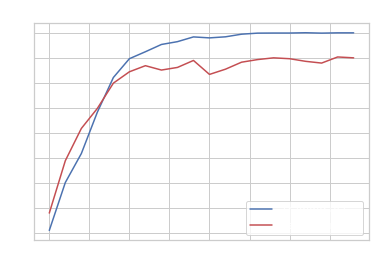

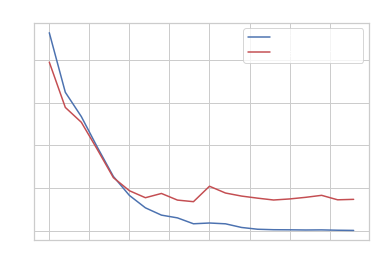

In [164]:
#Plotting graphs
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
print('Accuracy on train:',acc[len(acc)-1] ) 
print('Accuracy on valid:',val_acc[len(acc)-1] ) 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
print('lost on train:',loss[len(acc)-1] ) 
print('lost on valid:',val_loss[len(acc)-1] )  
plt.show()
## print report to see f1, recall 

[[9.99401569e-01 1.12089319e-05 6.55042004e-06 1.36886403e-04
  7.05057028e-05 1.22588444e-05 6.17582264e-05 3.11061267e-05
  1.83425545e-05 2.77948470e-06 3.49218135e-06 2.43619477e-04]
 [2.12700033e-05 1.38987685e-04 1.96960173e-03 1.78815014e-06
  9.90068734e-01 4.22713129e-06 3.39881044e-05 7.94384454e-04
  3.32798336e-05 6.54837396e-03 3.68284062e-04 1.71401734e-05]
 [1.45100174e-03 2.05186638e-03 4.87688571e-01 4.91989776e-04
  1.31919116e-01 1.57431921e-03 2.05406599e-04 1.01388425e-01
  3.11156991e-03 5.14009176e-03 6.32933453e-02 2.01684296e-01]
 [7.72297708e-03 4.38335631e-03 3.16313643e-04 9.72386241e-01
  6.80336598e-05 1.95487216e-03 9.88501962e-03 4.84233642e-05
  4.10032022e-04 2.43199611e-04 6.08612259e-04 1.97281688e-03]
 [7.73988140e-05 6.18213671e-04 1.17381642e-04 2.24312389e-05
  2.05915130e-04 7.11301435e-03 4.18873155e-04 9.89403248e-01
  2.35478670e-04 1.60708209e-03 1.44713005e-04 3.62277606e-05]
 [7.07704981e-04 1.34743590e-04 2.16850843e-02 4.19368327e-04
  1